# Classification des courbes de Béziers

#### Importation des données des courbes

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import seaborn as sns

In [404]:
df = pd.read_csv('data.txt', sep=' ')

In [405]:
df.head(5)

,x1,y1,x2,y2,x3,y3,angle1
0,0,0,76,67,67,0,40.950627
1,0,0,10,152,73,0,26.276755
2,0,0,70,17,138,0,152.313337
3,0,0,94,180,169,0,50.194429
4,0,0,42,146,72,0,27.660491


In [406]:
def get_angle(points) -> float:
    ba = points[0] - points[1]
    bc = points[2] - points[1]
    cosine_angle = (ba @ bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def draw(points, difficulty) -> None:
    Path = mpath.Path
    fig, ctx = plt.subplots()

    pp1 = mpatches.PathPatch(
        Path([points[0], points[1], points[2]],
             [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
        fc="none", transform=ctx.transData, linestyle="solid", linewidth=4, alpha=.5, color="#32a852")

    # Define lines over the control point
    ctx.plot([points[0][0], points[1][0]], [points[0][1],
                                            points[1][1]], dashes=[6, 2], color="#427852")
    ctx.plot([points[2][0], points[1][0]], [points[2][1],
                                            points[1][1]], dashes=[6, 2], color="#427852")

    # points
    ctx.plot(points[2][0], points[2][1], marker=".",
             markersize=16, color="#427852", clip_on=False)
    ctx.plot(points[1][0], points[1][1], marker=".",
             markersize=16, color="#0096b0", clip_on=False)
    ctx.plot(points[0][0], points[0][1], marker=".",
             markersize=16, color="#427852", clip_on=False)

    # Curve
    ctx.add_patch(pp1)

    title = "Difficulty : " + str(difficulty)
    # Title
    ctx.set_title(title)

    plt.xlim(0, 200)
    plt.ylim(0, 200)

    plt.show()
    plt.close()

In [407]:
# point 1 ==> np.array([a[0], a[1]])
# point 2 ==> np.array([a[2], a[3]]) (control point)
# point 3 ==> np.array([a[4], a[5]])
df["angle2"] = [get_angle([np.array([row[4], row[5]]), np.array([row[0], row[1]]), np.array([row[2], row[3]])])
                for row in df.itertuples(index=False)]

df["angle3"] = [180 - row[7] - row[6] 
                for row in df.itertuples(index=False)]

In [408]:
df.head(5)

,x1,y1,x2,y2,x3,y3,angle1,angle2,angle3
0,0,0,76,67,67,0,40.950627,41.398722,97.650651
1,0,0,10,152,73,0,26.276755,86.235965,67.487280
2,0,0,70,17,138,0,152.313337,13.650419,14.036243
3,0,0,94,180,169,0,50.194429,62.425436,67.380135
4,0,0,42,146,72,0,27.660491,73.950995,78.388514


In [409]:
X = df[["angle1", "angle2"]]
X

,angle1,angle2
0,40.950627,41.398722
1,26.276755,86.235965
2,152.313337,13.650419
3,50.194429,62.425436
4,27.660491,73.950995
...,...,...
5995,57.674835,83.709329
5996,24.547241,85.869144
5997,142.089527,14.281096
5998,11.523979,75.089686


In [410]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, n_init=50, max_iter=1000).fit(X)
y = model.predict(X)

In [421]:
df["Difficulty"] = y
df.sample(10)

,x1,y1,x2,y2,x3,y3,angle1,angle2,angle3,Difficulty
4167,0,0,117,59,148,0,90.957902,26.760599,62.281498,1
2715,0,0,139,157,171,0,53.040402,48.479918,78.479680,1
4843,0,0,132,193,140,0,36.743297,55.630299,87.626404,0
4261,0,0,69,5,48,0,9.247874,4.144624,166.607502,2
5911,0,0,48,31,126,0,125.469629,32.855722,21.674649,3
429,0,0,95,169,150,0,47.368811,60.658345,71.972843,0
395,0,0,154,55,77,0,15.883854,19.653824,144.462322,2
1343,0,0,6,49,29,0,32.125843,83.018943,64.855214,0
5175,0,0,32,17,72,0,128.995034,27.979474,23.025492,3
972,0,0,85,37,58,0,30.357450,23.523209,126.119341,2


In [412]:
class_0 = df[(df["Difficulty"] == 0)]
class_1 = df[(df["Difficulty"] == 1)]
class_2 = df[(df["Difficulty"] == 2)]
class_3 = df[(df["Difficulty"] == 3)]

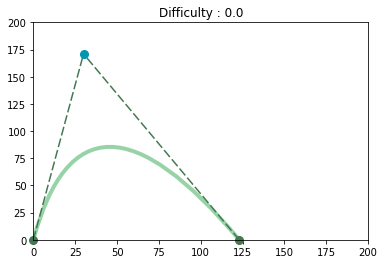

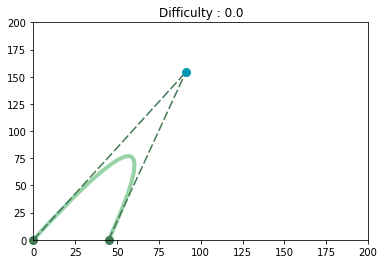

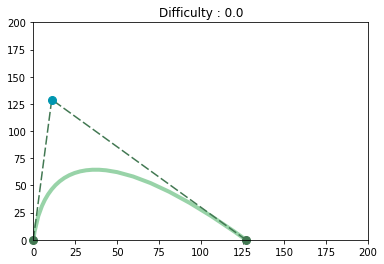

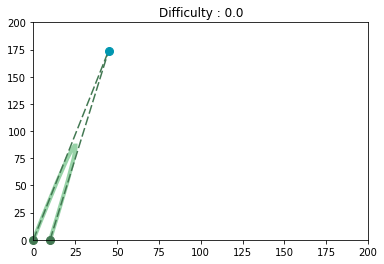

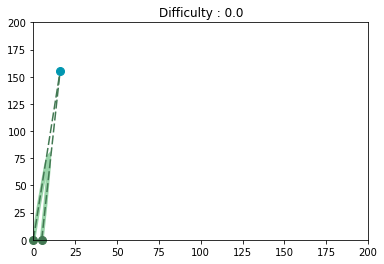

In [428]:
for i in range(5):
    index = np.random.choice(class_0.index)
    row = class_0.loc[[index]].to_numpy()
    point = [np.array([row[0][0], row[0][1]]).astype(int),
            np.array([row[0][2], row[0][3]]).astype(int),
            np.array([row[0][4], row[0][5]]).astype(int)]
    draw(point, row[0][9])

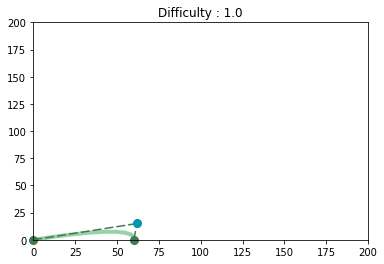

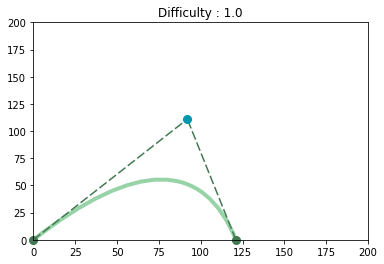

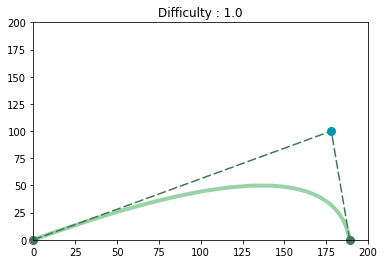

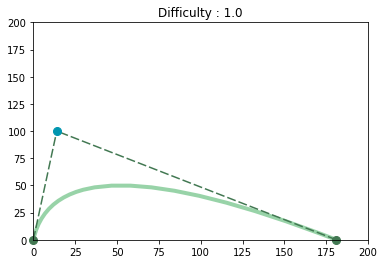

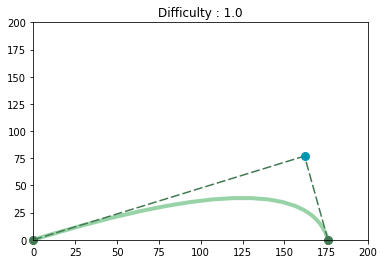

In [429]:
for i in range(5):
    index = np.random.choice(class_1.index)
    row = class_1.loc[[index]].to_numpy()
    point = [np.array([row[0][0], row[0][1]]).astype(int),
            np.array([row[0][2], row[0][3]]).astype(int),
            np.array([row[0][4], row[0][5]]).astype(int)]
    draw(point, row[0][9])

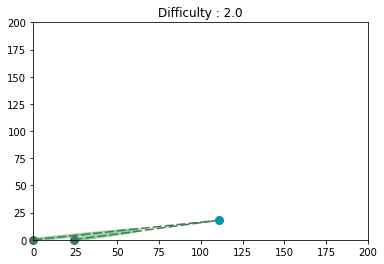

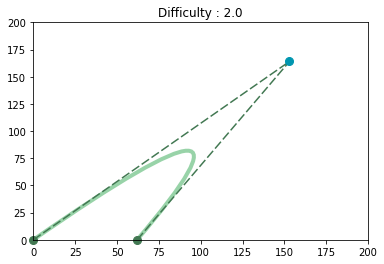

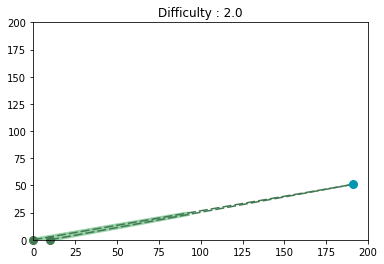

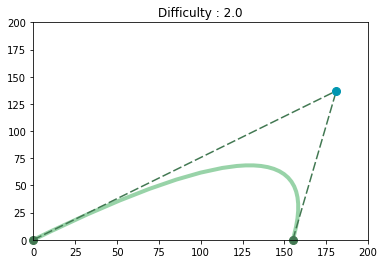

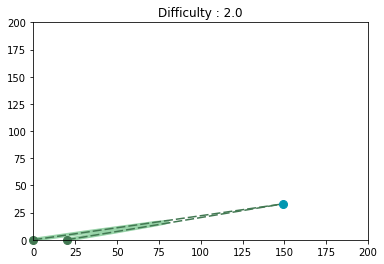

In [430]:
for i in range(5):
    index = np.random.choice(class_2.index)
    row = class_2.loc[[index]].to_numpy()
    point = [np.array([row[0][0], row[0][1]]).astype(int),
            np.array([row[0][2], row[0][3]]).astype(int),
            np.array([row[0][4], row[0][5]]).astype(int)]
    draw(point, row[0][9])

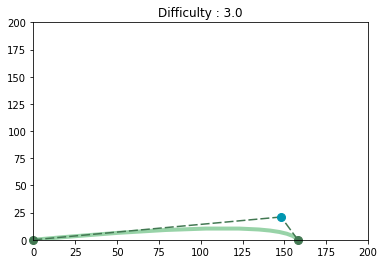

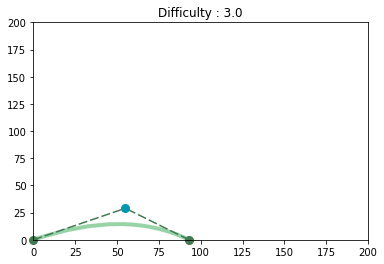

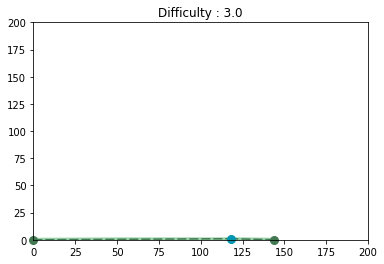

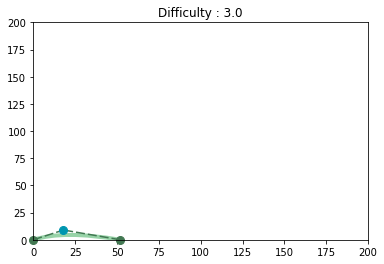

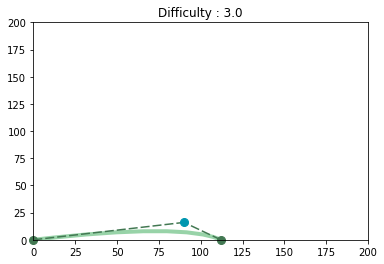

In [431]:
for i in range(5):
    index = np.random.choice(class_3.index)
    row = class_3.loc[[index]].to_numpy()
    point = [np.array([row[0][0], row[0][1]]).astype(int),
            np.array([row[0][2], row[0][3]]).astype(int),
            np.array([row[0][4], row[0][5]]).astype(int)]
    draw(point, row[0][9])

In [432]:
# Matrice de corrélation
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 10)
# sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)